In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil import parser

In [2]:
fineTech_appData = pd.read_csv('D:\ML Project\FineTech_appData.csv')

In [3]:
fineTech_appData.shape

(50000, 12)

In [4]:
fineTech_appData.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [5]:
fineTech_appData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
user                    50000 non-null int64
first_open              50000 non-null object
dayofweek               50000 non-null int64
hour                    50000 non-null object
age                     50000 non-null int64
screen_list             50000 non-null object
numscreens              50000 non-null int64
minigame                50000 non-null int64
used_premium_feature    50000 non-null int64
enrolled                50000 non-null int64
enrolled_date           31074 non-null object
liked                   50000 non-null int64
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [6]:
fineTech_appData.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#  hour data convert string to int
fineTech_appData['hour'] = fineTech_appData.hour.str.slice(1,3).astype(int)

In [8]:
fineTech_appData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
user                    50000 non-null int64
first_open              50000 non-null object
dayofweek               50000 non-null int64
hour                    50000 non-null int32
age                     50000 non-null int64
screen_list             50000 non-null object
numscreens              50000 non-null int64
minigame                50000 non-null int64
used_premium_feature    50000 non-null int64
enrolled                50000 non-null int64
enrolled_date           31074 non-null object
liked                   50000 non-null int64
dtypes: int32(1), int64(8), object(3)
memory usage: 4.4+ MB


In [9]:
fineTech_appData.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,12/27/12 2:14 AM,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,12/2/12 1:16 AM,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,3/19/13 7:19 PM,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,7/5/13 4:08 PM,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,7/5/13 4:11 PM,0
4,51549,2/26/13 6:50 PM,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2/26/13 6:56 PM,1


In [10]:
fineTech_appData2 = fineTech_appData.drop(['first_open','screen_list','enrolled_date'], axis=1)

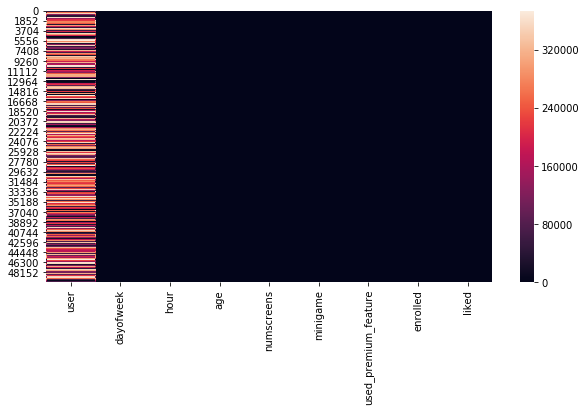

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(fineTech_appData2)

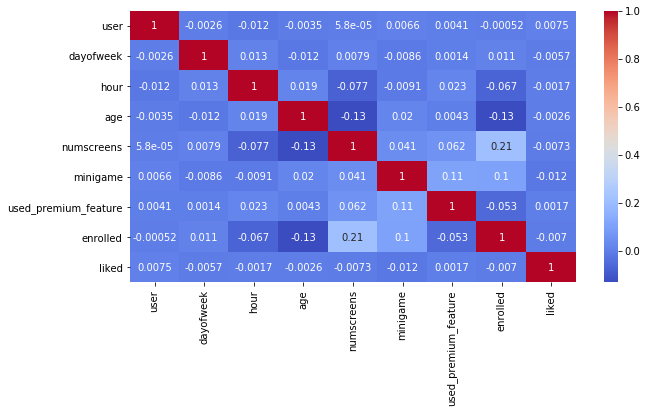

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(fineTech_appData2.corr(),annot=True,cmap='coolwarm')

In [13]:
#plt.hist(fineTech_appData2)
fineTech_appData2.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,15,0,0,0,0
1,333588,6,1,24,13,0,0,0,0
2,254414,1,19,23,3,0,1,0,1
3,234192,4,16,28,40,0,0,1,0
4,51549,1,18,31,32,0,0,1,1


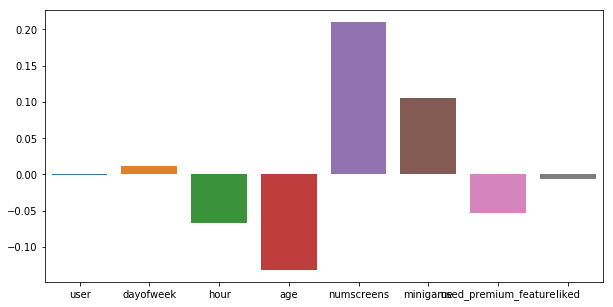

In [14]:
# show corelation barplot
plt.figure(figsize=(10,5))
fineTech_appData3 =fineTech_appData2.drop(['enrolled'],axis=1)
ax = sns.barplot(fineTech_appData3.columns,fineTech_appData3.corrwith(fineTech_appData2.enrolled))

In [15]:
# Get the unique value of each columns and it's length
features = fineTech_appData.columns
for i in features:
    print("""Unique value of {}\n{}\nlen is {} \n........................\n
          """.format(i, fineTech_appData[i].unique(), len(fineTech_appData[i].unique())))


Unique value of user
[235136 333588 254414 ... 302367 324905  27047]
len is 49874 
........................

          
Unique value of first_open
['12/27/12 2:14 AM' '12/2/12 1:16 AM' '3/19/13 7:19 PM' ...
 '4/9/13 12:05 AM' '2/20/13 10:41 PM' '4/28/13 12:33 PM']
len is 45335 
........................

          
Unique value of dayofweek
[3 6 1 4 2 0 5]
len is 7 
........................

          
Unique value of hour
[ 2  1 19 16 18  9  3 14  4 11  6 21  5 17 20  0 22 10  8 15 13 23 12  7]
len is 24 
........................

          
Unique value of age
[ 23  24  28  31  20  35  26  29  39  32  25  17  21  55  38  27  48  37
  22  36  30  58  40  33  57  19  45  34  46  56  42  43  41  47  18  53
  44  49  60  50  52  62  63  16  54  70  51  69  68  59  76  75  66  61
  72  65  90  64  67  73  77  71  74  89  78  86  80  82  79  87  81  85
 101  88  83 100  84  98]
len is 78 
........................

          
Unique value of screen_list
['idscreen,joinscreen,Cycle,product_re

In [16]:
fineTech_appData.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,12/27/12 2:14 AM,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,12/2/12 1:16 AM,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,3/19/13 7:19 PM,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,7/5/13 4:08 PM,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,7/5/13 4:11 PM,0
4,51549,2/26/13 6:50 PM,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2/26/13 6:56 PM,1


In [17]:
fineTech_appData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
user                    50000 non-null int64
first_open              50000 non-null object
dayofweek               50000 non-null int64
hour                    50000 non-null int32
age                     50000 non-null int64
screen_list             50000 non-null object
numscreens              50000 non-null int64
minigame                50000 non-null int64
used_premium_feature    50000 non-null int64
enrolled                50000 non-null int64
enrolled_date           31074 non-null object
liked                   50000 non-null int64
dtypes: int32(1), int64(8), object(3)
memory usage: 4.4+ MB


In [18]:
# parsinf object data into data time format
# fineTech_appData['first_open'] =[parser.parse(i) for i in fineTech_appData['first_open']]
# fineTech_appData['enrolled_date'] =[parser.parse(i) if isinstance(i, str) else i for i in fineTech_appData['enrolled_date']]
# fineTech_appData.dtypes

fineTech_appData['enrolled_date'] = pd.to_datetime(fineTech_appData['enrolled_date'])
fineTech_appData['first_open'] = pd.to_datetime(fineTech_appData['first_open'])

In [19]:
fineTech_appData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
user                    50000 non-null int64
first_open              50000 non-null datetime64[ns]
dayofweek               50000 non-null int64
hour                    50000 non-null int32
age                     50000 non-null int64
screen_list             50000 non-null object
numscreens              50000 non-null int64
minigame                50000 non-null int64
used_premium_feature    50000 non-null int64
enrolled                50000 non-null int64
enrolled_date           31074 non-null datetime64[ns]
liked                   50000 non-null int64
dtypes: datetime64[ns](2), int32(1), int64(8), object(1)
memory usage: 4.4+ MB


In [20]:
fineTech_appData['time_to_enrolled']  = (fineTech_appData.enrolled_date - fineTech_appData.first_open).astype('timedelta64[h]')

(array([2.8195e+04, 1.0320e+03, 5.6700e+02, 4.2500e+02, 2.8800e+02,
        1.7900e+02, 1.6500e+02, 9.7000e+01, 1.0400e+02, 2.2000e+01]),
 array([   0. ,  543.4, 1086.8, 1630.2, 2173.6, 2717. , 3260.4, 3803.8,
        4347.2, 4890.6, 5434. ]),
 <a list of 10 Patch objects>)

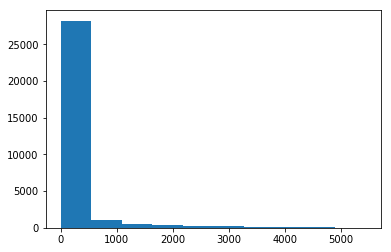

In [21]:
plt.hist(fineTech_appData['time_to_enrolled'].dropna())

In [22]:
fineTech_appData.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,time_to_enrolled
0,235136,2012-12-27 02:14:00,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:00,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:00,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:00,0,0.0
4,51549,2013-02-26 18:50:00,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:00,1,0.0


In [23]:
#Feature selection
#We are considering those customers have enrolled after 48 hours as 0.

fineTech_appData.loc[fineTech_appData.time_to_enrolled > 48, 'enrolled'] = 0
fineTech_appData.drop(columns=['time_to_enrolled','enrolled_date','first_open'],inplace=True)

In [24]:
fineTech_appData.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1


In [25]:
fineTech_appData.shape

(50000, 10)

In [26]:
fineTech_app_screen_Data = pd.read_csv('D:\\ML Project\\top_screens.csv').top_screens.values

In [27]:
fineTech_app_screen_Data

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [28]:
#Add ‘,’ at the end of each string of ‘screen_list’ for further operation.
fineTech_appData['screen_list'] = fineTech_appData.screen_list.astype(str) + ','
#The ‘Screen_list’ contains string values but we can’t use it directly. 
#So to solve this problem we are taking each screen name from ‘fineTech_app_screen_Data’ and append as a column by the same name to ‘fineTech_appData’. 
#Then check this screen name is available in ‘screen_list’ if it is available then add value 1 else 0 in the appended column.
for screen_name in fineTech_app_screen_Data:
    fineTech_appData[screen_name] = fineTech_appData.screen_list.str.contains(screen_name).astype(int)
    fineTech_appData['screen_list'] = fineTech_appData.screen_list.str.replace(screen_name + ',',"")

In [29]:
fineTech_appData.shape

(50000, 68)

In [30]:
fineTech_appData.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,254414,1,19,23,,3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# remain screen in 'screen_list'
fineTech_appData.loc[0,'screen_list']

'joinscreen,product_review,ScanPreview,VerifyToken,ProfileVerifySSN,Settings,ForgotPassword,'

In [32]:
# count remain screen list and store counted number in 'remain_screen_list'
fineTech_appData['remain_screen_list'] = fineTech_appData.screen_list.str.count(",")

In [33]:
fineTech_appData.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,,3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,...,0,0,0,0,0,0,0,0,0,10


In [34]:
# Drop the 'screen_list'
fineTech_appData.drop(columns = ['screen_list'], inplace=True)

In [35]:
# total columns
fineTech_appData.columns

Index([u'user', u'dayofweek', u'hour', u'age', u'numscreens', u'minigame',
       u'used_premium_feature', u'enrolled', u'liked', u'Loan2', u'location',
       u'Institutions', u'Credit3Container', u'VerifyPhone',
       u'BankVerification', u'VerifyDateOfBirth', u'ProfilePage',
       u'VerifyCountry', u'Cycle', u'idscreen', u'Credit3Dashboard', u'Loan3',
       u'CC1Category', u'Splash', u'Loan', u'CC1', u'RewardsContainer',
       u'Credit3', u'Credit1', u'EditProfile', u'Credit2', u'Finances', u'CC3',
       u'Saving9', u'Saving1', u'Alerts', u'Saving8', u'Saving10',
       u'Leaderboard', u'Saving4', u'VerifyMobile', u'VerifyHousing',
       u'RewardDetail', u'VerifyHousingAmount', u'ProfileMaritalStatus',
       u'ProfileChildren ', u'ProfileEducation', u'Saving7',
       u'ProfileEducationMajor', u'Rewards', u'AccountView',
       u'VerifyAnnualIncome', u'VerifyIncomeType', u'Saving2', u'Saving6',
       u'Saving2Amount', u'Saving5', u'ProfileJobTitle', u'Login',
       u'Profil

In [36]:
# take sum of all saving screen in one place
saving_screens = ['Saving1',
                  'Saving2',
                  'Saving2Amount',
                  'Saving4',
                  'Saving5',
                  'Saving6',
                  'Saving7',
                  'Saving8',
                  'Saving9',
                  'Saving10',
                 ]
fineTech_appData['saving_screens_count'] = fineTech_appData[saving_screens].sum(axis = 1)
fineTech_appData.drop(columns = saving_screens, inplace = True)

In [37]:
credit_screens = ['Credit1',
                  'Credit2',
                  'Credit3',
                  'Credit3Container',
                  'Credit3Dashboard',
                 ]
fineTech_appData['credit_screens_count'] = fineTech_appData[credit_screens].sum(axis = 1)
fineTech_appData.drop(columns = credit_screens, axis = 1, inplace = True)

In [38]:
cc_screens = ['CC1',
              'CC1Category',
              'CC3',
             ]
fineTech_appData['cc_screens_count'] = fineTech_appData[cc_screens].sum(axis = 1)
fineTech_appData.drop(columns = cc_screens, inplace = True)

In [39]:
loan_screens = ['Loan',
                'Loan2',
                'Loan3',
                'Loan4',
               ]
fineTech_appData['loan_screens_count'] = fineTech_appData[loan_screens].sum(axis = 1)
fineTech_appData.drop(columns = loan_screens, inplace = True)

In [40]:
fineTech_appData.shape

(50000, 50)

In [41]:
fineTech_appData_clean = pd.read_csv('D:\ML Project\clean_FineTech_appData.csv')

In [42]:
fineTech_appData_clean.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screens_count,credit_screens_count,cc_screens_count,loan_screens_count
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [43]:
# plt.figure(figsize=(15,10))
# sns.heatmap(fineTech_appData_clean.corr(),annot=True,linewidths=2)

In [44]:
#Data preprocessing
#Split dataset in Train and Test

#fineTech_appData_clean = fineTech_appData
target =fineTech_appData_clean['enrolled']
fineTech_appData_clean.drop(columns = 'enrolled', inplace = True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fineTech_appData_clean, target, test_size = 0.2, random_state = 0)
print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of y_test = ', y_test.shape)

('Shape of X_train = ', (40000, 49))
('Shape of X_test = ', (10000, 49))
('Shape of y_train = ', (40000L,))
('Shape of y_test = ', (10000L,))


In [45]:
train_userID = X_train['user']
X_train.drop(columns= 'user', inplace =True)
test_userID = X_test['user']
X_test.drop(columns= 'user', inplace =True)
print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of train_userID = ', train_userID.shape)
print('Shape of test_userID = ', test_userID.shape)

('Shape of X_train = ', (40000, 48))
('Shape of X_test = ', (10000, 48))
('Shape of train_userID = ', (40000L,))
('Shape of test_userID = ', (10000L,))


C:\ProgramData\Anaconda2\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
